In [1]:
import os
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn

In [2]:
current_path = os.getcwd()
duckdb_file_path = f"{current_path}/indonesiare.duckdb"
con = duckdb.connect(duckdb_file_path) 

# Analysis

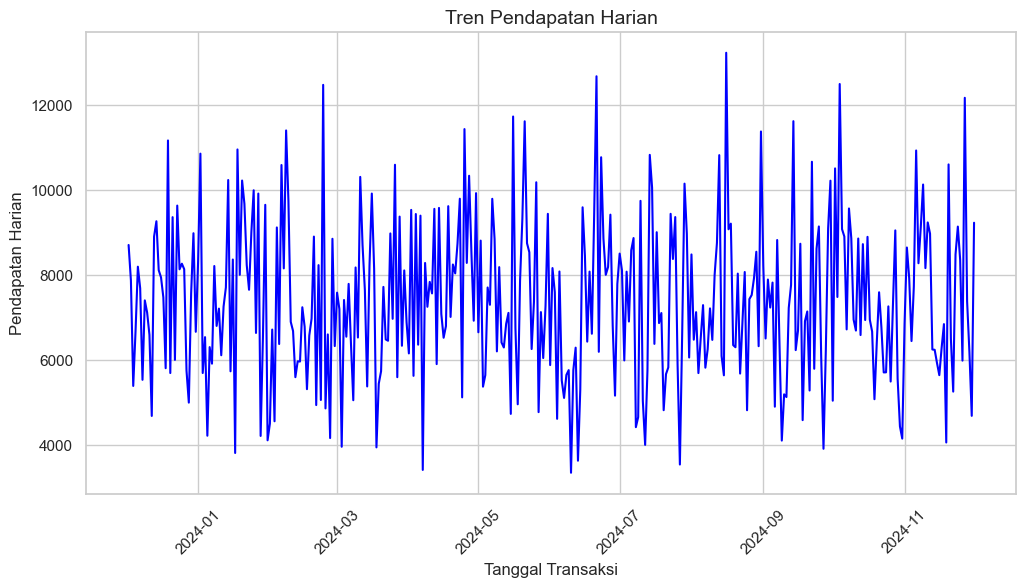

In [3]:
query = """
SELECT transaction_date, sum(total_revenue) as daily_revenue
FROM daily_sales
GROUP BY 1
ORDER BY 1
"""
result = con.execute(query).fetchdf()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x="transaction_date", y="daily_revenue", color="blue")
plt.title("Tren Pendapatan Harian", fontsize=14)
plt.xlabel("Tanggal Transaksi", fontsize=12)
plt.ylabel("Pendapatan Harian", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [4]:
query = """
SELECT transaction_date, sum(total_revenue) as daily_revenue
FROM daily_sales
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
"""
result = con.execute(query).fetchdf()
result

,transaction_date,daily_revenue
0,2024-08-16,13239.38
1,2024-06-21,12685.33
2,2024-10-04,12503.11
3,2024-02-24,12483.26
4,2024-11-27,12178.46
5,2024-05-16,11737.58
6,2024-09-14,11627.59
7,2024-05-21,11624.76
8,2024-04-25,11441.58
9,2024-02-08,11409.54


Dari data diatas pendapatan harian beberapa kali menyentuh angka diatas 12.000 dan juga jika dilihat dari 10 pendapatan harian tertinggi di dominasi pendapatan atau transaksi di atas tanggal 20, dengan data ini bisa digunakan untuk meningkatkan awareness customer dengan beberapa campaign sehingga ketika tiba waktu gajian kemungkinan untuk konversi menjadi pendapatan bisa meningkat

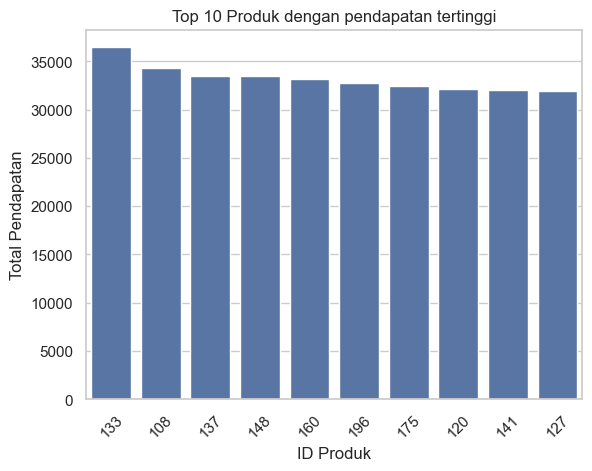

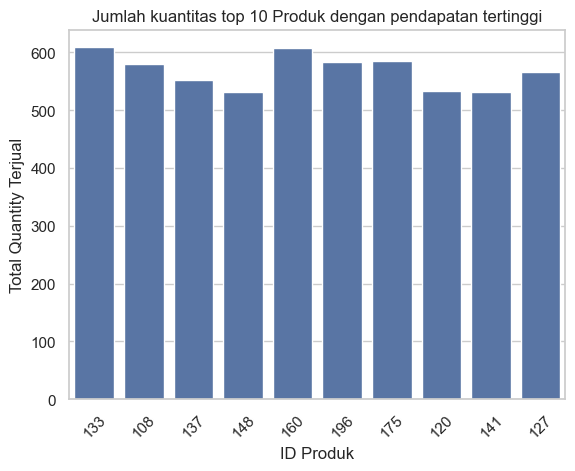

In [5]:
query = """
SELECT 
    product_id, 
    SUM(quantity) AS total_quantity_sold, 
    SUM(total_revenue) AS total_revenue 
FROM daily_sales
GROUP BY product_id
ORDER BY total_revenue DESC
LIMIT 10;
"""

result = con.execute(query).fetchdf()

sns.barplot(data=result, x="product_id", y="total_revenue")
plt.title("Top 10 Produk dengan pendapatan tertinggi")
plt.xlabel("ID Produk")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45)
plt.show()

sns.barplot(data=result, x="product_id", y="total_quantity_sold")
plt.title("Jumlah kuantitas top 10 Produk dengan pendapatan tertinggi")
plt.xlabel("ID Produk")
plt.ylabel("Total Quantity Terjual")
plt.xticks(rotation=45)
plt.show()

Grafik diatas menunjukkan 10 produk dengan pendapatan tertinggi, dengan produk yang memiliki kode 133 mendapatkan revenue tertinggi, beberapa produk ini bisa di pasang untuk promosi sehingga bisa menarik customer baru

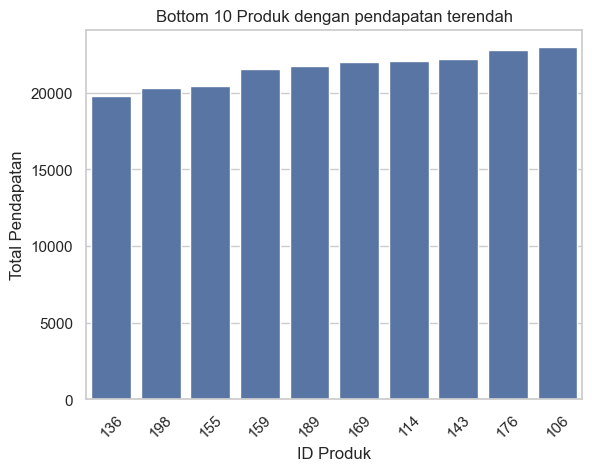

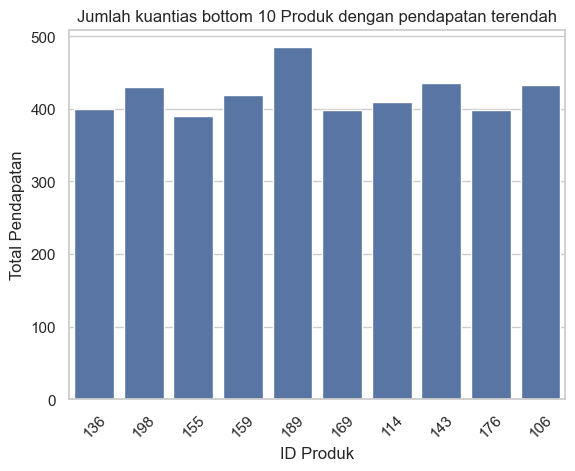

In [6]:
query = """
SELECT 
    product_id, 
    SUM(quantity) AS total_quantity_sold, 
    SUM(total_revenue) AS total_revenue 
FROM daily_sales
GROUP BY product_id
ORDER BY total_revenue ASC
LIMIT 10;
"""

result = con.execute(query).fetchdf()

sns.barplot(data=result, x="product_id", y="total_revenue")
plt.title("Bottom 10 Produk dengan pendapatan terendah")
plt.xlabel("ID Produk")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45)
plt.show()

sns.barplot(data=result, x="product_id", y="total_quantity_sold")
plt.title("Jumlah kuantias bottom 10 Produk dengan pendapatan terendah")
plt.xlabel("ID Produk")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45)
plt.show()

Produk dengan kode 136 dan 155 masuk dalam 3 produk dengan pendapatan paling rendah dan juga memiliki penjualan dibawah 400, produk-produk ini harus mendapatkan perhatian dan dilakukan review lebih lanjut

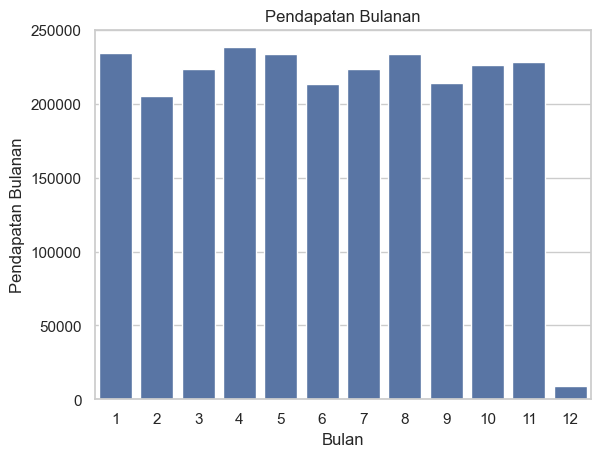

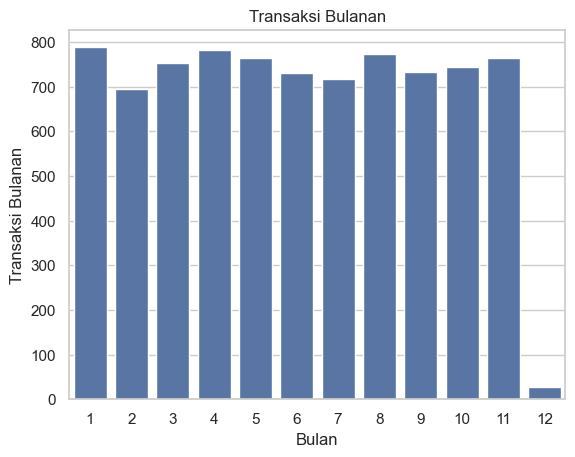

In [7]:
query = """
SELECT 
    EXTRACT(MONTH FROM transaction_date) AS month, 
    SUM(total_revenue) AS monthly_revenue,
    COUNT(transaction_id) AS monthly_transaction
FROM daily_sales
WHERE YEAR(transaction_date) = 2024
GROUP BY month
ORDER BY month;
"""

result = con.execute(query).fetchdf()
sns.barplot(data=result, x="month", y="monthly_revenue")
plt.title("Pendapatan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Pendapatan Bulanan")
plt.show()

result = con.execute(query).fetchdf()
sns.barplot(data=result, x="month", y="monthly_transaction")
plt.title("Transaksi Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Transaksi Bulanan")
plt.show()

Dari grafik diatas, tiap bulan mengalami fluktuasi yang cukup besar terutama setelah januari pendapatan cukup anjlok, dan juga terjadi penurunan setelah bulan 4 atau april yang pada bulan ini juga terjadi kegiatan besar yaitu ramadhan dan lebaran. namun yang perlu di lakukan reveiw adalah bulan juni(6) dan september(9) karena dengan transaksi yang bahkan lebih tinggi dari bulan juli(7) namun pendapatannya lebih rendah dibandingkan bulan juli

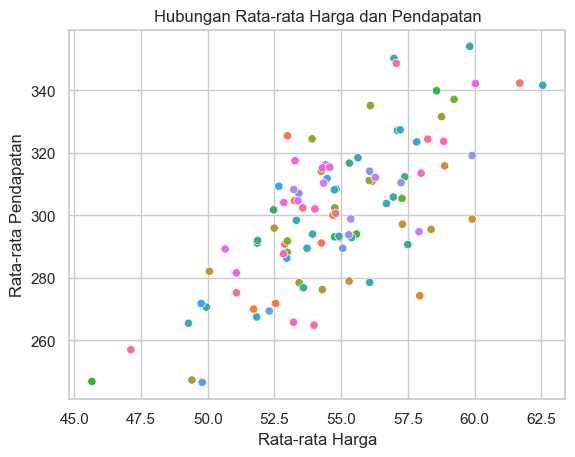

In [8]:
query = """
SELECT product_id, AVG(price) AS average_price, AVG(total_revenue) AS average_revenue
FROM daily_sales
GROUP BY product_id;
"""
df = con.execute(query).fetchdf()

# Membuat grafik
sns.scatterplot(data=df, x="average_price", y="average_revenue", hue="product_id",legend=False)
plt.title("Hubungan Rata-rata Harga dan Pendapatan")
plt.xlabel("Rata-rata Harga")
plt.ylabel("Rata-rata Pendapatan")
plt.show()

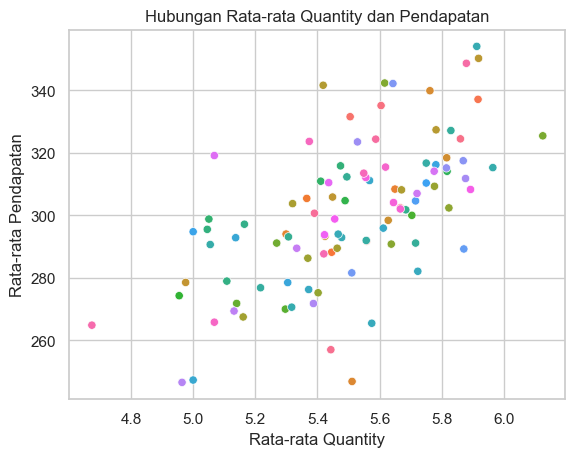

In [9]:
query = """
SELECT product_id, AVG(quantity) AS average_quantity, AVG(total_revenue) AS average_revenue
FROM daily_sales
GROUP BY product_id;
"""
df = con.execute(query).fetchdf()

# Membuat grafik
sns.scatterplot(data=df, x="average_quantity", y="average_revenue", hue="product_id",legend=False)
plt.title("Hubungan Rata-rata Quantity dan Pendapatan")
plt.xlabel("Rata-rata Quantity")
plt.ylabel("Rata-rata Pendapatan")
plt.show()

Dari grafik di atas ternyata harga berbanding lurus dengan pendapatan, namun tidak terlalu berpengaruh untuk kuantitas jika dibandingkan dengan harga

In [10]:
con.close()